<a href="https://colab.research.google.com/github/jmestanza/deep-learning/blob/main/Mestanza-Joaquin-DL-TP%20Co17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Universidad de Buenos Aires
# Deep Learning - TP
# Cohorte 17 - 5to bimestre 2024


El TP comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta **las 20hs del Lunes 02 de diciembre**. La resolución es individual. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (permitir acceso a las siguientes direcciones: alfonsorafel93@gmail.com y lelectronfou@gmail.com) y **se realizará en el siguiente link de google form: [link](https://docs.google.com/forms/d/e/1FAIpQLScnAC5wu1fIOqDKGrbdV8MZfU6AlJ6B7tBNNpL3qRAEGaudzg/viewform?usp=sf_link)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA!

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP Co(numero de cohorte).ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.


**Condiciones de aprobación**
- Se aprueba con más del 60% del examen bien resuelto de cada parte del TP (Parte 1 y Parte 2).
- La escala de notas empleada por la UBA es aprobado para nota igual o superior a 4.

# Parte 1
Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro.
- a) Praparacion del dataset: procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

Particularmente para los puntos b), c) y d) vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece al grupo 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).
- b) Definir uno o varios puntos de comparacion (benchmark) para comparar los modelos. Pueden usarse modelos de ML clasico de facil entrenamiento.
- c) Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.
- d)	Entrenar un modelo de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Comparar contra el modelo sin embeddings.
Recordar que tanto para el punto c) como el d) pueden usarse herramientas como regularizacion y prueba de hiperpametros para conseguir mejores resultados.
- e) Para el modelo del punto d) implementar una funcion que a reciba un id de usuario y sugiera **n** cantidad usuarios que tuvieron un comportamiento de compras similar.
- f) Para el mejor modelo obtenido en el apartado d) elegir al menos 2 hiperparametros para tunear. Explicar el metodo utilizado y los resultados obtenidos. Recordar de explicar los criterios de eleccion de los hiperpametros, no elegirlos al azar.



# Parte 2.a

Implemente una arquitectura de red neuronal basada en CNN para identificar del dataset fashion MNIST las 10 clases del mismo. Sobre dicho modelo, realize una exploración de 5 variantes distintas (que se desprenden del modelo propuesto) variando alguno (o varios) de los siguientes hiperparámetros:
- numero de capas.
- numero de kernels.
- tamaño de kernels.


Evalue la evolución de la función de perdida y la accuracy (para train y test) para cada modelo en una gráfica con las curvas de los 5 modelos propuestos. Compare también el tiempo de entrenamiento y peso (tamaño) de cada modelo. Aplique técnicas de regularización para evitar overfitting. Elija el modelo que considera mejor y justifique.
Entregables:
 - Grafica comparativa de función de perdida vs epochs para los 5 modelos.
 - Grafica comparativa de función de accuracy vs epochs para los 5 modelos.
 - Tabla comparativa (o grafico de barras) del tiempo de entrenamiento y pesos de cada modelo.
 - Justificación del modelo elegio (qué consideró para elegir el modelo y bajo qué criterio).



In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [2]:
# Download train data from open datasets.
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)

# Download test data from open datsets.
test_data=datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)


100%|██████████| 26.4M/26.4M [00:00<00:00, 116MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 5.55MB/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4.42M/4.42M [00:00<00:00, 60.5MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 18.6MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



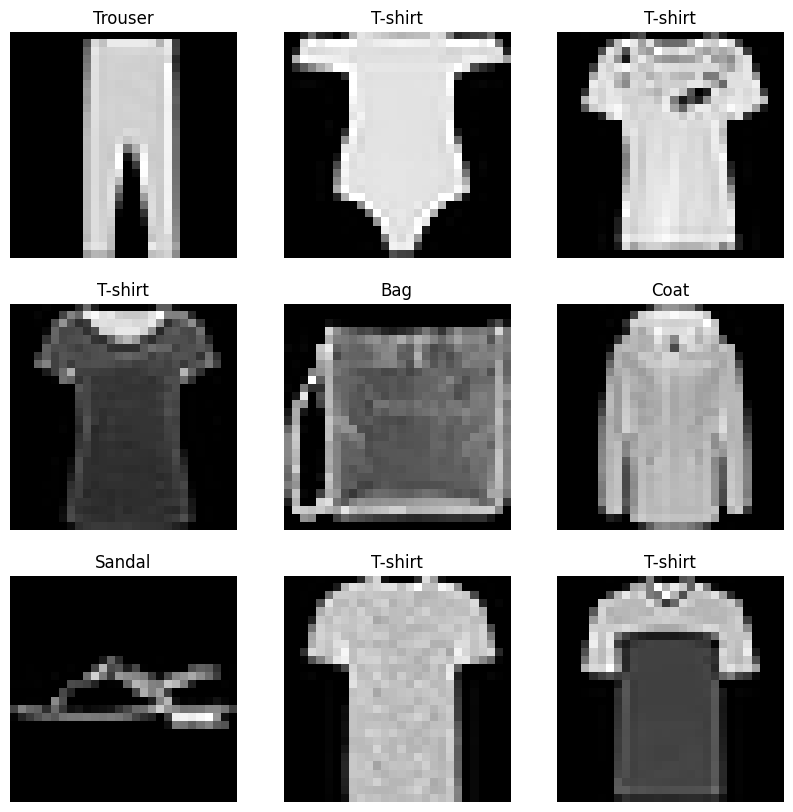

In [3]:
import matplotlib.pyplot as plt

labels_map={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize = (10,10))
cols, rows = 3, 3

for i in range (1, cols*rows + 1):
    sample_idx = torch.randint(len(train_data), size = (1,)).item()
    image, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Parte 2.b

Empleando el modelo entrenado y elegido por Ud. en el punto anterior **(NO USAR RESNET U OTRO MODELO DISPONIBLE, TIENE QUE USAR EL QUE UD DESARROLLÓ)**, realice transfer learning para procesar las imágenes del dataset MNIST (los números) **e identificar los números mayores o menores a 4,5**.
Para el entrenamiento emplee solamente 20.000 muestras del set de entrenamiento y valide con el set de testeo. Al reducir el train set, mantenga equilibrada la distribución de las clases.

Elija la estrategia de transfer learning acorde a los visto en la teoría y justifique su elección.

Compare las curvas de entrenamiento y accurracy empleando transfer learning o usando la arquitectura elejida en el punto anterior pero entrenando desde cero.
Entregables:
- Estrategia elegida y su justificación.
- Grafica comparativa de función de perdida vs epochs para el modelo con transfer learning y sin transfer learning.
- Grafica comparativa de función de accuracy vs epochs para el modelo con transfer learning y sin transfer learning.
- Comentarios sobre las curvas graficadas.


## Resolución


In [4]:
import os
dataset_path = '/content/dataset_black_sales.csv'
if not os.path.exists(dataset_path):
  print('Dataset not downloaded yet.')
  !gdown '1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd'

if os.path.exists(dataset_path):
  print('Dataset available.')



Dataset not downloaded yet.
Downloading...
From: https://drive.google.com/uc?id=1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd
To: /content/dataset_black_sales.csv
100% 25.5M/25.5M [00:00<00:00, 56.9MB/s]
Dataset available.


## 1.a Preparacion del dataset: procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

In [5]:
import pandas as pd
dataset = pd.read_csv(dataset_path)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Ver si User ID lo sacamos o utilizamos algun embedding

In [7]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
(dataset.isnull().sum()/len(dataset))*100

,0
User_ID,0.000000
Product_ID,0.000000
Gender,0.000000
Age,0.000000
Occupation,0.000000
City_Category,0.000000
Stay_In_Current_City_Years,0.000000
Marital_Status,0.000000
Product_Category_1,0.000000
Product_Category_2,31.566643


Podemos ver que en cuanto a null values Product_Category_2 tiene 31.56% y Product_Category_3 69.67%.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def plot_distribution(dataframe, fields, callback, cols=3, figsize=(20,15)):
    rows = len(fields)//cols + 1
    f, axes = plt.subplots(rows,cols, figsize=figsize)
    axes = axes.flatten()

    for i,ax in enumerate(axes):
        if i < len(fields):
            callback(ax, dataframe[fields[i]])
        else:
            ax.axis('off')

In [10]:
bin_count_vars = [
    'Gender',
    'Age',
    'Occupation',
    'City_Category',
    'Stay_In_Current_City_Years',
    'Marital_Status',
    'Product_Category_1',
    'Product_Category_2',
    'Product_Category_3'
]

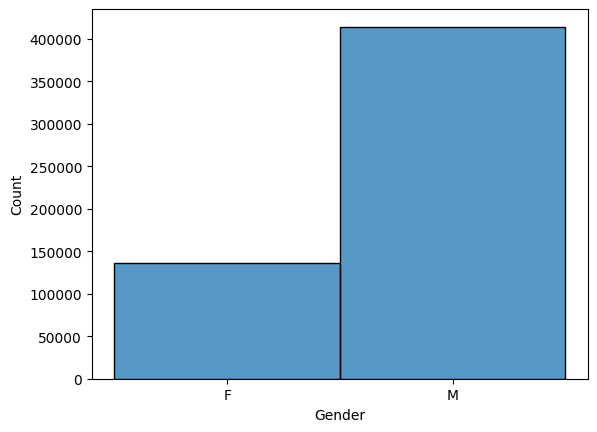

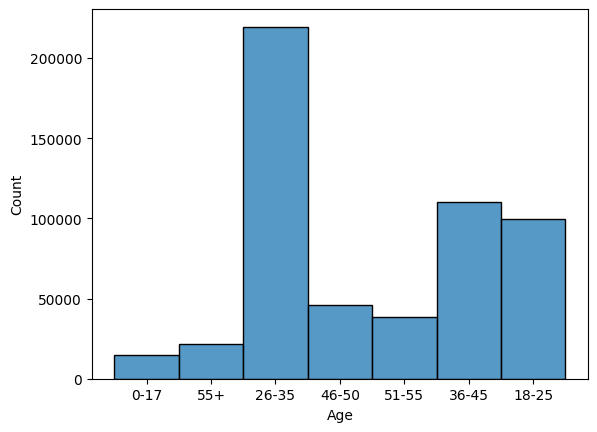

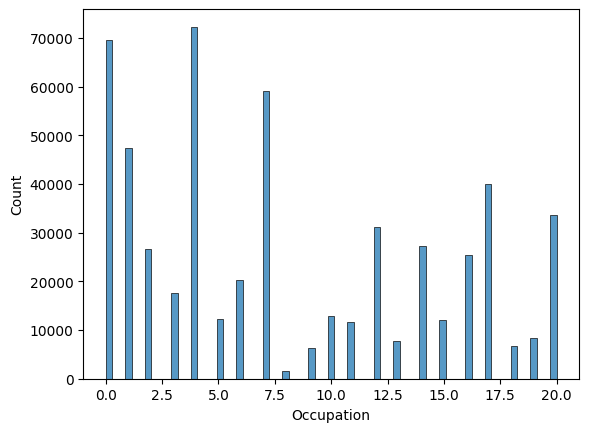

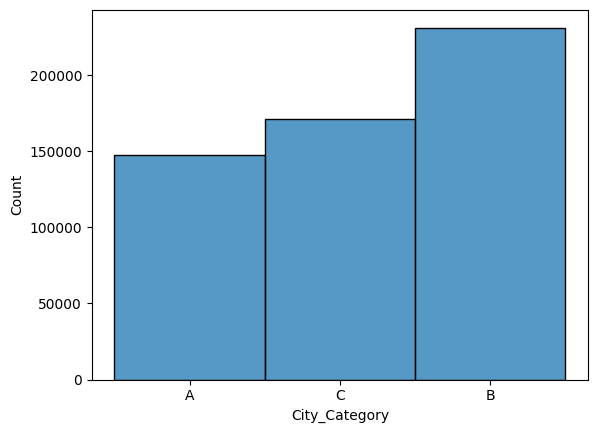

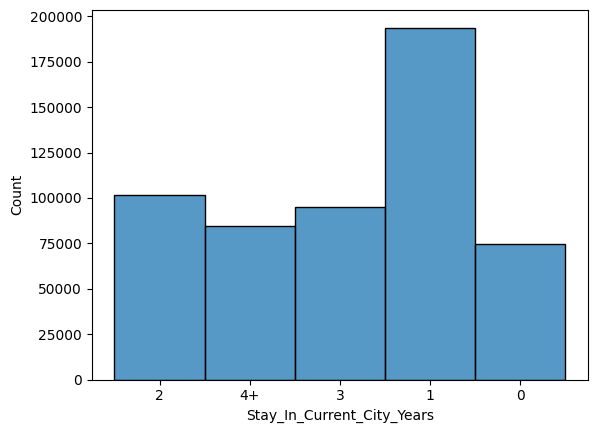

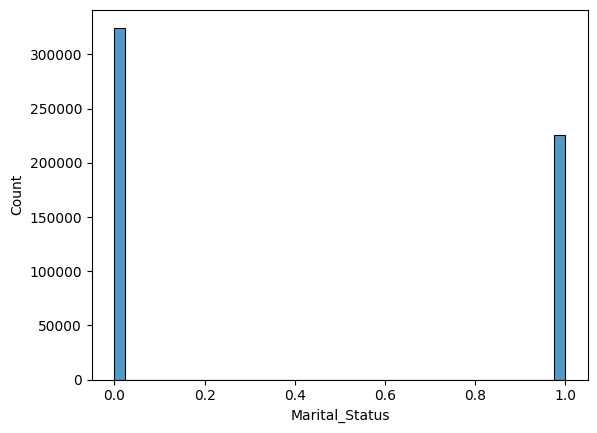

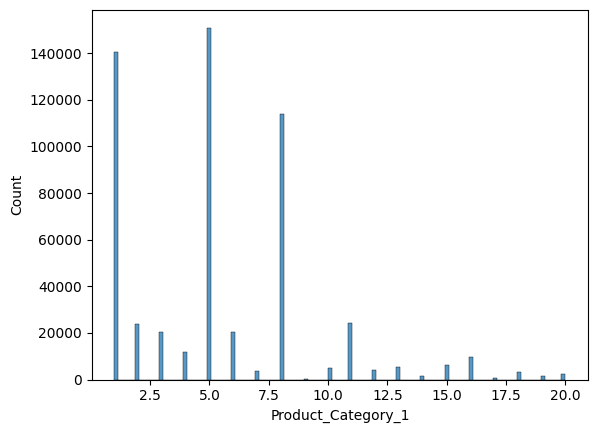

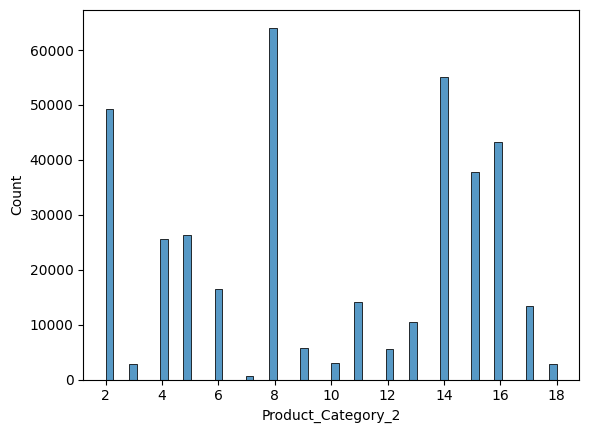

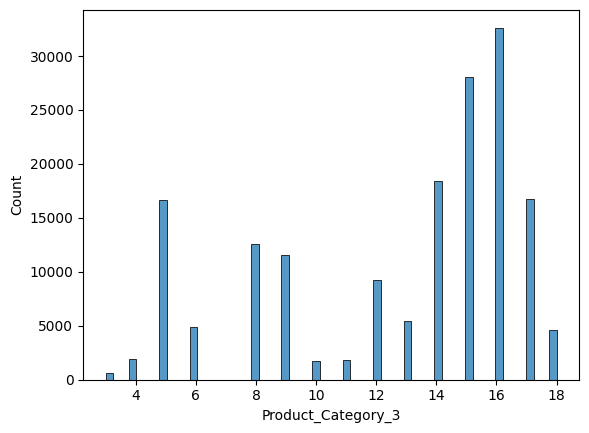

In [11]:
# def bincount_cb(ax, data):
#     sns.histplot(data, ax=ax, shrink=0.8)  # Use histplot instead of displot


# plot_distribution(dataset, bin_count_vars, bincount_cb)
for var in bin_count_vars:
  sns.histplot(dataset[var])
  plt.show()

In [12]:
histogram_vars = [
    'Purchase'
]

<Axes: xlabel='Purchase', ylabel='Count'>

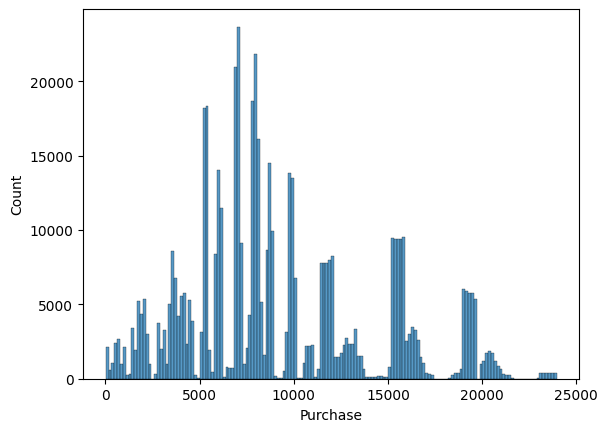

In [13]:
sns.histplot(dataset['Purchase'])

In [14]:
left_out_vars = [x for x in dataset.columns if x not in bin_count_vars+histogram_vars]
left_out_vars

['User_ID', 'Product_ID']

Preprocesamiento

In [15]:
# Encode categorical variables
encoded_dataset = dataset.copy()
encoded_dataset['Gender'] =  dataset['Gender'].map({'F':0,'M':1})
encoded_dataset['Age'] = dataset['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
encoded_dataset['City_Category'] = dataset['City_Category'].map({'A':1,'B':2,'C':3})
encoded_dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})

encoded_dataset.head(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,7,16,3,4,0,8,NaN,NaN,7969
5,1000003,P00193542,1,3,15,1,3,0,1,2.0,NaN,15227
6,1000004,P00184942,1,5,7,2,2,1,1,8.0,17.0,19215
7,1000004,P00346142,1,5,7,2,2,1,1,15.0,NaN,15854
8,1000004,P0097242,1,5,7,2,2,1,1,16.0,NaN,15686
9,1000005,P00274942,1,3,20,1,1,1,8,NaN,NaN,7871


In [16]:
corr = encoded_dataset.drop(columns=['Product_ID', 'User_ID']).corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Gender,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.018591,0.028069,0.060346
Age,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.054877,0.057346,0.015839
Occupation,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,-0.000384,0.013263,0.020833
City_Category,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.011822,-0.002347,0.061914
Stay_In_Current_City_Years,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001657,0.002093,0.005422
Marital_Status,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,-0.018591,0.054877,-0.000384,-0.011822,-0.001657,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.028069,0.057346,0.013263,-0.002347,0.002093,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


Handle de missing values

Dado que Product_Category_3 tiene baja correlación con el target (Purchase) y tiene un 70% de valores en NaN, decidimos dropearla.

Otro enfoque posible habría sido agregar una columna más que indique que está missing e imputar.

In [17]:
dataset_wo_pc3 = encoded_dataset.drop(columns=['Product_Category_3'])

In [18]:
dataset_imputed_pc2 = dataset_wo_pc3.copy()

# Find the most frequent value (mode) of the column
most_frequent_value = dataset_imputed_pc2['Product_Category_2'].mode()[0]

# Replace missing values without using inplace
dataset_imputed_pc2['Product_Category_2'] = dataset_imputed_pc2['Product_Category_2'].fillna(most_frequent_value)

In [19]:

# 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).
def purchase_group(value):
  if value < 5000:
    return 0
  elif value < 10000:
    return 1
  elif value < 15000:
    return 2
  else:
    return 3

new_dataset = dataset_imputed_pc2.copy()
new_dataset['Group'] = dataset['Purchase'].apply(purchase_group)

In [20]:
new_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,Group
0,1000001,P00069042,0,1,10,1,2,0,3,8.0,8370,1
1,1000001,P00248942,0,1,10,1,2,0,1,6.0,15200,3
2,1000001,P00087842,0,1,10,1,2,0,12,8.0,1422,0
3,1000001,P00085442,0,1,10,1,2,0,12,14.0,1057,0
4,1000002,P00285442,1,7,16,3,4,0,8,8.0,7969,1


(array([ 94923.,      0.,      0., 265606.,      0.,      0.,  79016.,
             0.,      0., 110523.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

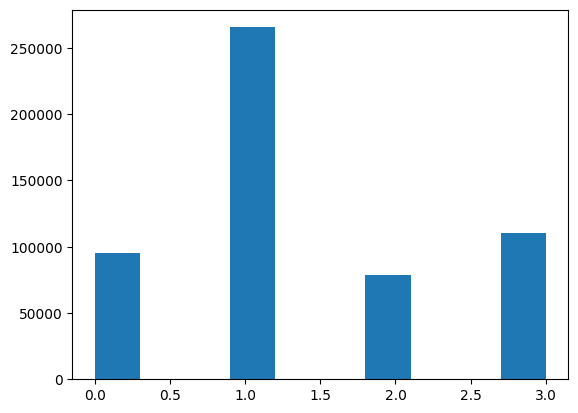

In [21]:
plt.hist(new_dataset['Group'])

## 1. b Definir uno o varios puntos de comparacion (benchmark) para comparar los modelos. Pueden usarse modelos de ML clasico de facil entrenamiento.

- Logistic Regression
- KNN
- Decision Tree Classifier
- Random Forest Classifier

In [22]:
dataset_wo_embeddings = new_dataset.drop(columns=['Product_ID', 'User_ID'])


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Define features and target
X = dataset_wo_embeddings.drop(columns=['Group'])  # Features
y = dataset_wo_embeddings['Group']                # Target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# 3. Standardize features (necessary for Logistic Regression and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store models and results
models = {
    'Logistic Regression': LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# 4. Train and evaluate models
for name, model in models.items():
    print(f"--- {name} ---")
    # For models sensitive to feature scaling
    if name in ['Logistic Regression', 'KNN']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")


--- Logistic Regression ---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8795971421819041
Confusion Matrix:
 [[28461    16     0     0]
 [    1 79681     0     0]
 [    0 19819  3853    33]
 [    0     0     0 33157]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     28477
           1       0.80      1.00      0.89     79682
           2       1.00      0.16      0.28     23705
           3       1.00      1.00      1.00     33157

    accuracy                           0.88    165021
   macro avg       0.95      0.79      0.79    165021
weighted avg       0.90      0.88      0.84    165021



--- KNN ---
Accuracy: 0.9649196162912599
Confusion Matrix:
 [[26533  1944     0     0]
 [  398 78251  1033     0]
 [    1  1998 21454   252]
 [    0     0   163 32994]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     28477
           1       0.95      0.98      0.97     79682
           2       0.95   

## 1.c Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.

In [40]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics


class MyDataset(Dataset):

  #__init__ guarda el dataset en una variable de clase
  def __init__(self, x, y):
    self.x = x
    self.y = y

  # __len__ define el comportamiento de la función len() sobre el objeto
  def __len__(self):
    return self.x.shape[0]

  # __getitem__ define el comportamiento de los []
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [41]:
train_ds = MyDataset(X_train.to_numpy(), y_train.to_numpy())
valid_ds = MyDataset(X_test.to_numpy(), y_test.to_numpy())

In [42]:
train_ds[0]

(array([0.000e+00, 3.000e+00, 1.700e+01, 3.000e+00, 1.000e+00, 0.000e+00,
        8.000e+00, 1.400e+01, 9.975e+03]),
 1)

In [43]:
train_dataloader = DataLoader(train_ds, batch_size =64, shuffle= True)
valid_dataloader = DataLoader(valid_ds, batch_size=64)

In [44]:
batch_1 = next(iter(train_dataloader))
batch_1[1].shape

torch.Size([64])

In [45]:
print(type(batch_1[0]))

<class 'torch.Tensor'>


In [40]:
class NNet(torch.nn.Module):

  def __init__(self):
    # Defino la arquitectura de la red
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=13, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features = 100, out_features= 1, bias=True)

  def forward(self, x):
    # Defino el cálculo del paso forward
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

In [47]:
nnet = NNet()

In [49]:
# Imprimimos los parámetros optimizables de la red
#print([p for p in nnet.parameters()])

In [50]:
# Imprimo la cantidad de parámetros optimizables de la red
print(sum(p.numel() for p in nnet.parameters()))

23001


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
X = dataset_wo_embeddings.drop(columns=['Group'])  # Features
y = dataset_wo_embeddings['Group']                # Target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)  # Class indices must be long
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [29]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [43]:
print(torch.__version__)  # Should print 2.5.1+cu121
print(torch.cuda.is_available())  # Should return True if CUDA is enabled
print(torch.cuda.get_device_name(0))  # Should show your GPU name

2.5.1+cu121
True
Tesla T4


In [38]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# nnet = NeuralNetwork(input_size, num_classes)  # Create an instance
# nnet = nnet.to(device)  # Move the model to the device


In [47]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(model)
model = model.to(device)

NeuralNetwork(
  (fc): Sequential(
    (0): Linear(in_features=9, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=4, bias=True)
  )
)


In [45]:
# Copio la red neuronal al dispositivo donde entrene la red neuronal
NNet = NNet.to(device)

AttributeError: 'torch.device' object has no attribute '_apply'

In [26]:
import torch.optim as optim

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.fc(x)

input_size = X_train_tensor.shape[1]
num_classes = len(set(y))
model = NeuralNetwork(input_size, num_classes)


# 3. Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. Train the Model
num_epochs = 50
batch_size = 32
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(num_epochs):
    # Training
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss, correct = 0.0, 0
    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i + batch_size]
        batch_X, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == batch_y).sum().item()

    train_loss = epoch_loss / (X_train_tensor.size(0) // batch_size)
    train_acc = correct / X_train_tensor.size(0)

    # Validation
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        val_loss = criterion(outputs, y_test_tensor).item()
        _, predicted = torch.max(outputs, 1)
        val_acc = accuracy_score(y_test_tensor, predicted)

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

# 5. Visualize Loss and Accuracy
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.title("Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'accuracy_score' is not defined